In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("default")

In [4]:
# get all the clubs from the 5 best league in europe .
# For each club get all the players
# For each player get the basic info and injury history
# tuples = []
# i=0
# for t in open('/home/yahor/Documents/uni/sem_3/twd/football-injuries/analysis_from_new_data/Final-player.txt'):
#     i=i+1
#     if i == 2580:
#         tuples.append(eval(t[1:-1]))
#     else:
#         tuples.append(eval(t[1:-2]))
# df = pd.DataFrame(tuples)
# df.columns = ["id", "name", "club","club_value","birth","weight","height","country","role","foot","transfers","injuries"]
# number_of_players = df.shape[0]
# df.shape

In [5]:
df = pd.read_csv("/home/yahor/Documents/uni/sem_3/twd/football-injuries/analysis_from_new_data/Final-player.csv")

In [6]:
df = df[df['birth'].notnull()]
number_of_new_players = df.shape[0]
df.shape

(2521, 13)

In [7]:
df.head()

,Unnamed: 0,id,name,club,club_value,birth,weight,height,country,role,foot,transfers,injuries
0,0,238223,Ederson,Manchester City,"1,14 Bill. €",1993-08-17,89,"1,88",Brazil,Goalkeeper,left,"[('\nBenfica ', '\nMan City ', '17/18', 'Jul 1...","[('16/17', 'Meniscal Injury', '29')]"
1,1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[('\nFC Barcelona ', '\nMan City ', '16/17', '...","[('18/19', 'Achilles tendon rupture', '314'), ..."
2,2,371021,Arijanet Murić,Manchester City,"1,14 Bill. €",1998-11-07,-,"1,98",Kosovo,Goalkeeper,right,"[('\nNAC Breda ', '\nMan City ', '18/19', 'Aug...",[]
3,3,186590,John Stones,Manchester City,"1,14 Bill. €",1994-05-28,69,"1,88",England,Defender - Centre-Back,right,"[('\nEverton ', '\nMan City ', '16/17', 'Aug 9...","[('18/19', 'Muscle Injury', '6'), ('17/18', 'M..."
4,4,176553,Aymeric Laporte,Manchester City,"1,14 Bill. €",1994-05-27,85,"1,91",France,Defender - Centre-Back,left,"[('\nAthletic ', '\nMan City ', '17/18', 'Jan ...","[('18/19', 'Muscle Injury', '12'), ('16/17', '..."


In [9]:
injuries_list = [injurie[1] for injurie in df['injuries'].sum()]
s = pd.Series(injuries_list).value_counts()
for injur in (s[s > 75].index):
    print(injur)

IndexError: string index out of range

In [142]:
s.head()

Hamstring Injury     825
Muscular problems    666
Muscle Injury        583
Ankle Injury         516
Unknown Injury       514
Name: count, dtype: int64

In [143]:
s = pd.DataFrame(s)

In [144]:
s.reset_index(inplace=True)

In [145]:
s

,index,count
0,Hamstring Injury,825
1,Muscular problems,666
2,Muscle Injury,583
3,Ankle Injury,516
4,Unknown Injury,514
...,...,...
289,Compartment syndrome,1
290,Knee Cyst,1
291,Peroneus tendon injury,1
292,Medial Collateral Ligament avulsion,1


<Figure size 640x480 with 0 Axes>

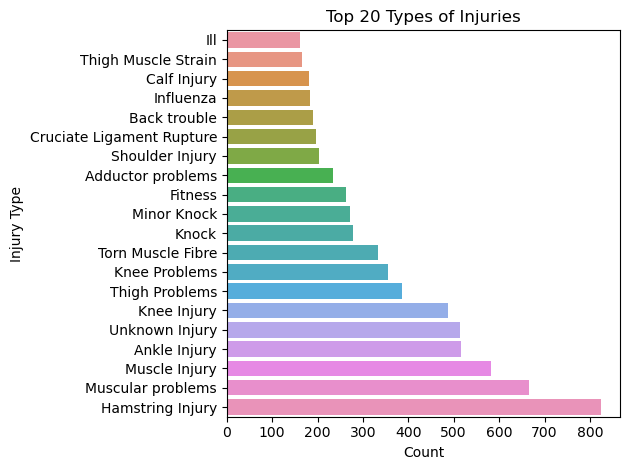

In [146]:
plt.figure()
sns.barplot(y="index", x="count", data=s[:20].sort_values(by = "count"))
plt.title('Top 20 Types of Injuries')
plt.ylabel('Injury Type')
plt.xlabel('Count')
# plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('../images/top_20_injuries.png')
plt.show()

In [147]:
s = df.apply(lambda x: pd.Series(x[11]),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'injury'
df = df.drop(['injuries'], axis=1).join(s)
df.reset_index()
df.head()

,id,name,club,club_value,birth,weight,height,country,role,foot,transfers,injury
0,238223,Ederson,Manchester City,"1,14 Bill. €",1993-08-17,89,"1,88",Brazil,Goalkeeper,left,"[(\nBenfica , \nMan City , 17/18, Jul 1, 2017)...","(16/17, Meniscal Injury, 29)"
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...","(18/19, Achilles tendon rupture, 314)"
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...","(16/17, Disrupted Calf Muscle, 57)"
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...","(15/16, Calf Injury, 17)"
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...","(15/16, Torn muscle bundle, 24)"


In [148]:
df.shape

(12915, 12)

In [149]:
df = df.reset_index(drop=True)
df.head()

,id,name,club,club_value,birth,weight,height,country,role,foot,transfers,injury
0,238223,Ederson,Manchester City,"1,14 Bill. €",1993-08-17,89,"1,88",Brazil,Goalkeeper,left,"[(\nBenfica , \nMan City , 17/18, Jul 1, 2017)...","(16/17, Meniscal Injury, 29)"
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...","(18/19, Achilles tendon rupture, 314)"
2,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...","(16/17, Disrupted Calf Muscle, 57)"
3,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...","(15/16, Calf Injury, 17)"
4,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...","(15/16, Torn muscle bundle, 24)"


In [150]:
df = df[df['injury'].notnull()]
df.shape

(12456, 12)

In [151]:
# 3 columns inster 

In [152]:
df_injury = pd.DataFrame(df['injury'].tolist(), index=df.index)
df_injury.head()

,0,1,2
0,16/17,Meniscal Injury,29
1,18/19,Achilles tendon rupture,314
2,16/17,Disrupted Calf Muscle,57
3,15/16,Calf Injury,17
4,15/16,Torn muscle bundle,24


In [153]:
df = df.drop('injury', axis=1).join(df_injurie)
df.head()

,id,name,club,club_value,birth,weight,height,country,role,foot,transfers,0,1,2
0,238223,Ederson,Manchester City,"1,14 Bill. €",1993-08-17,89,"1,88",Brazil,Goalkeeper,left,"[(\nBenfica , \nMan City , 17/18, Jul 1, 2017)...",16/17,Meniscal Injury,29
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",18/19,Achilles tendon rupture,314
2,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",16/17,Disrupted Calf Muscle,57
3,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",15/16,Calf Injury,17
4,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",15/16,Torn muscle bundle,24


In [154]:
df = df.rename(index=str, columns={0: "season", 1: "type" , 2 : "days"})
df.head()

,id,name,club,club_value,birth,weight,height,country,role,foot,transfers,season,type,days
0,238223,Ederson,Manchester City,"1,14 Bill. €",1993-08-17,89,"1,88",Brazil,Goalkeeper,left,"[(\nBenfica , \nMan City , 17/18, Jul 1, 2017)...",16/17,Meniscal Injury,29
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",18/19,Achilles tendon rupture,314
2,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",16/17,Disrupted Calf Muscle,57
3,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",15/16,Calf Injury,17
4,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",15/16,Torn muscle bundle,24


In [155]:
clubs_injuries = df[["club"]].value_counts()

In [156]:
clubs_injuries = pd.DataFrame(clubs_injuries)

In [157]:
clubs_injuries.reset_index(inplace = True)
clubs_injuries.sort_values(by="count", inplace=True, ascending=False)

In [158]:
clubs_injuries.head()

,club,count
0,Bayern Munich,264
1,Hertha BSC,264
2,Eintracht Frankfurt,257
3,Borussia Dortmund,251
4,FC Augsburg,234


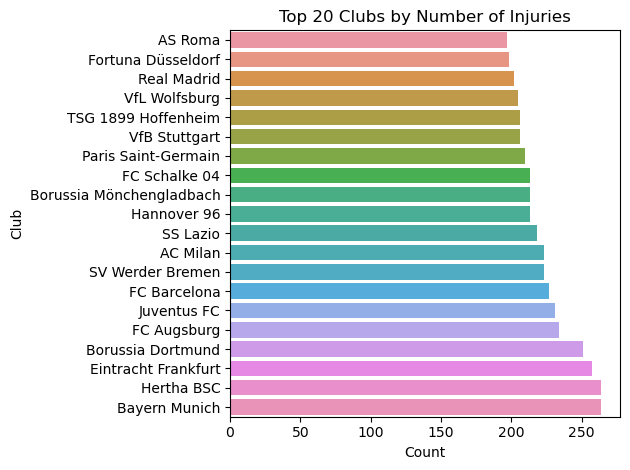

In [160]:
plt.figure()
sns.barplot(y="club", x="count", data=clubs_injuries[:20].sort_values(by="count"))
plt.title('Top 20 Clubs by Number of Injuries')
plt.ylabel('Club')
plt.xlabel('Count')
# plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('../images/top_20_clubs.png')
plt.show()

In [161]:
df.head()

,id,name,club,club_value,birth,weight,height,country,role,foot,transfers,season,type,days
0,238223,Ederson,Manchester City,"1,14 Bill. €",1993-08-17,89,"1,88",Brazil,Goalkeeper,left,"[(\nBenfica , \nMan City , 17/18, Jul 1, 2017)...",16/17,Meniscal Injury,29
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",18/19,Achilles tendon rupture,314
2,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",16/17,Disrupted Calf Muscle,57
3,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",15/16,Calf Injury,17
4,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",15/16,Torn muscle bundle,24


In [166]:
country_injuries = pd.DataFrame(df[["country"]].value_counts())

In [167]:
country_injuries.reset_index(inplace=True)

In [170]:
country_injuries.sort_values(by="count", ascending=False, inplace=True)

In [173]:
country_injuries.head()

,country,count
0,Germany,2052
1,Spain,1538
2,Italy,1325
3,France,868
4,England,578


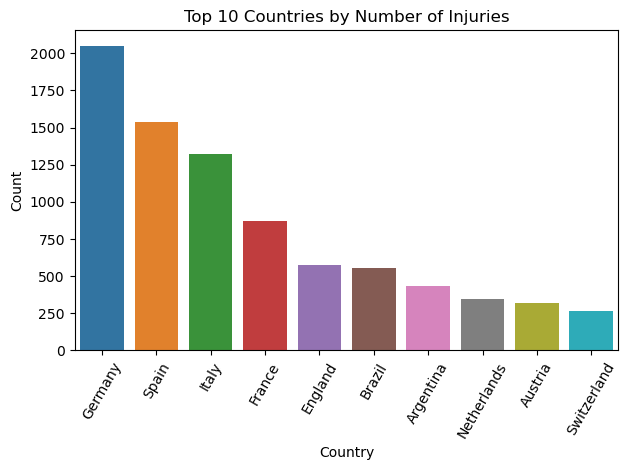

In [179]:
plt.figure()
sns.barplot(x="country", y="count", data=country_injuries[:10])
plt.title('Top 10 Countries by Number of Injuries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.tight_layout()
plt.savefig('../images/top_10_countries.png')
plt.show()

In [182]:
import datetime

In [185]:
df.season = df.season.apply(lambda x : '20' + x[3:] + '-01-01')

In [186]:
def injury_age(season,birth):
    return datetime.datetime.strptime(season, '%Y-%m-%d').year - datetime.datetime.strptime(birth, '%Y-%m-%d').year

In [187]:
df['age'] = df.apply(lambda x : injury_age(x['season'], x['birth']), axis=1)

In [188]:
df.head()

,id,name,club,club_value,birth,weight,height,country,role,foot,transfers,season,type,days,age
0,238223,Ederson,Manchester City,"1,14 Bill. €",1993-08-17,89,"1,88",Brazil,Goalkeeper,left,"[(\nBenfica , \nMan City , 17/18, Jul 1, 2017)...",2017-01-01,Meniscal Injury,29,24
1,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",2019-01-01,Achilles tendon rupture,314,36
2,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",2017-01-01,Disrupted Calf Muscle,57,34
3,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",2016-01-01,Calf Injury,17,33
4,40423,Claudio Bravo,Manchester City,"1,14 Bill. €",1983-04-13,84,"1,84",Chile,Goalkeeper,right,"[(\nFC Barcelona , \nMan City , 16/17, Aug 25,...",2016-01-01,Torn muscle bundle,24,33


In [193]:
ill = pd.DataFrame(df[(df['type'] == 'Ill') & (df['age'] > 19) & (df['age'] < 36)]['age'].value_counts(normalize='true').sort_index())

In [195]:
ill.reset_index(inplace=True)

In [196]:
ill

,age,proportion
0,20,0.098684
1,21,0.131579
2,22,0.118421
3,23,0.078947
4,24,0.092105
5,25,0.111842
6,26,0.072368
7,27,0.052632
8,28,0.052632
9,29,0.065789


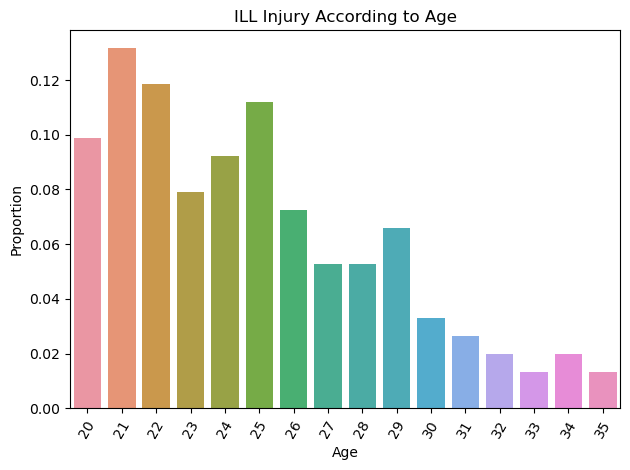

In [198]:
plt.figure()
sns.barplot(x="age", y="proportion", data=ill)
plt.title('ILL Injury According to Age')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.xticks(rotation=60)
plt.tight_layout()
plt.savefig('../images/ill_injury.png')
plt.show()

In [114]:
#df.to_csv("Final-player-injuies.csv")